In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('flight_price_prediction.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200153 entries, 0 to 200152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           200153 non-null  object 
 1   flight            200153 non-null  object 
 2   source_city       200153 non-null  object 
 3   departure_time    200153 non-null  object 
 4   stops             200153 non-null  object 
 5   arrival_time      200153 non-null  object 
 6   destination_city  200153 non-null  object 
 7   class             200153 non-null  object 
 8   duration          200153 non-null  float64
 9   days_left         200153 non-null  int64  
 10  price             200153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 16.8+ MB


### График распределения данных

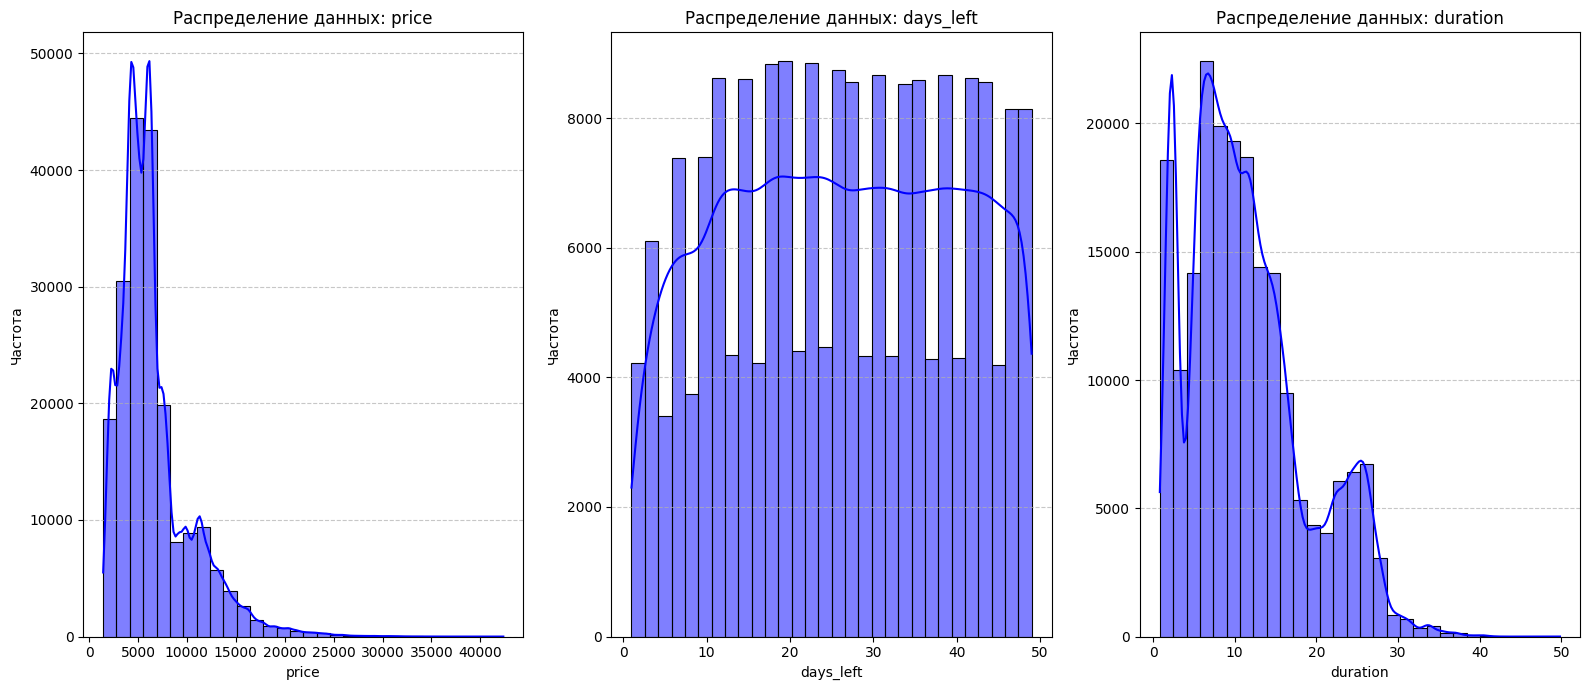

In [2]:
data = pd.read_csv('flight_price_prediction.csv')
numerical_columns = ['price', 'days_left', 'duration']

fig, axes = plt.subplots(1, 3, figsize=(16, 7), sharey=False)

for i, col in enumerate(numerical_columns):
    sns.histplot(data[col], kde=True, bins=30, color='blue', ax=axes[i])
    axes[i].set_title(f"Распределение данных: {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Частота')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig("graphs/distribution_graph.png")
plt.show()

### Ящик с усами для числовых признаков

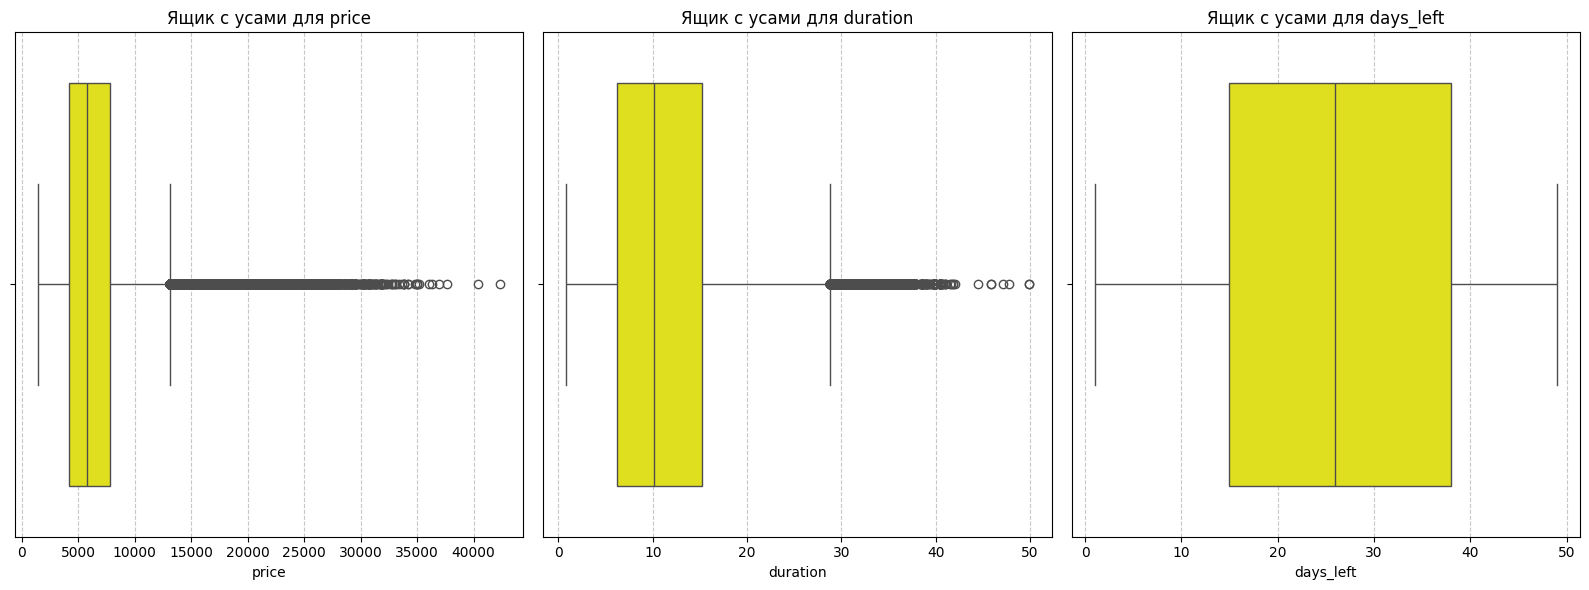

In [3]:
data = pd.read_csv('flight_price_prediction.csv')
numerical_columns = ['price', 'duration', 'days_left']

fig, axes = plt.subplots(1, 3, figsize=(16, 6), sharey=False)

for i, col in enumerate(numerical_columns):
    sns.boxplot(x=data[col], color='yellow', ax=axes[i])
    axes[i].set_title(f"Ящик с усами для {col}")
    axes[i].set_xlabel(col)
    axes[i].grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('graphs/boxplot.png')
plt.show()

##### Выбросы

In [4]:
import json

outlires_info = {}

for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outliers_count = len(outliers)
    
    outlires_info[col] = {
        "lower_bound": lower_bound,
        "upper_bound": upper_bound,
        "outliers_count": outliers_count,
        "percentage": round(((outliers_count / len(data)) * 100), 3),
    }


with open('stats/outliers_data.json', 'w', encoding='utf-8') as f:
    json.dump(outlires_info, f, ensure_ascii=False, indent=4)

### Диаграммы количественного распределения для текстовых признаков

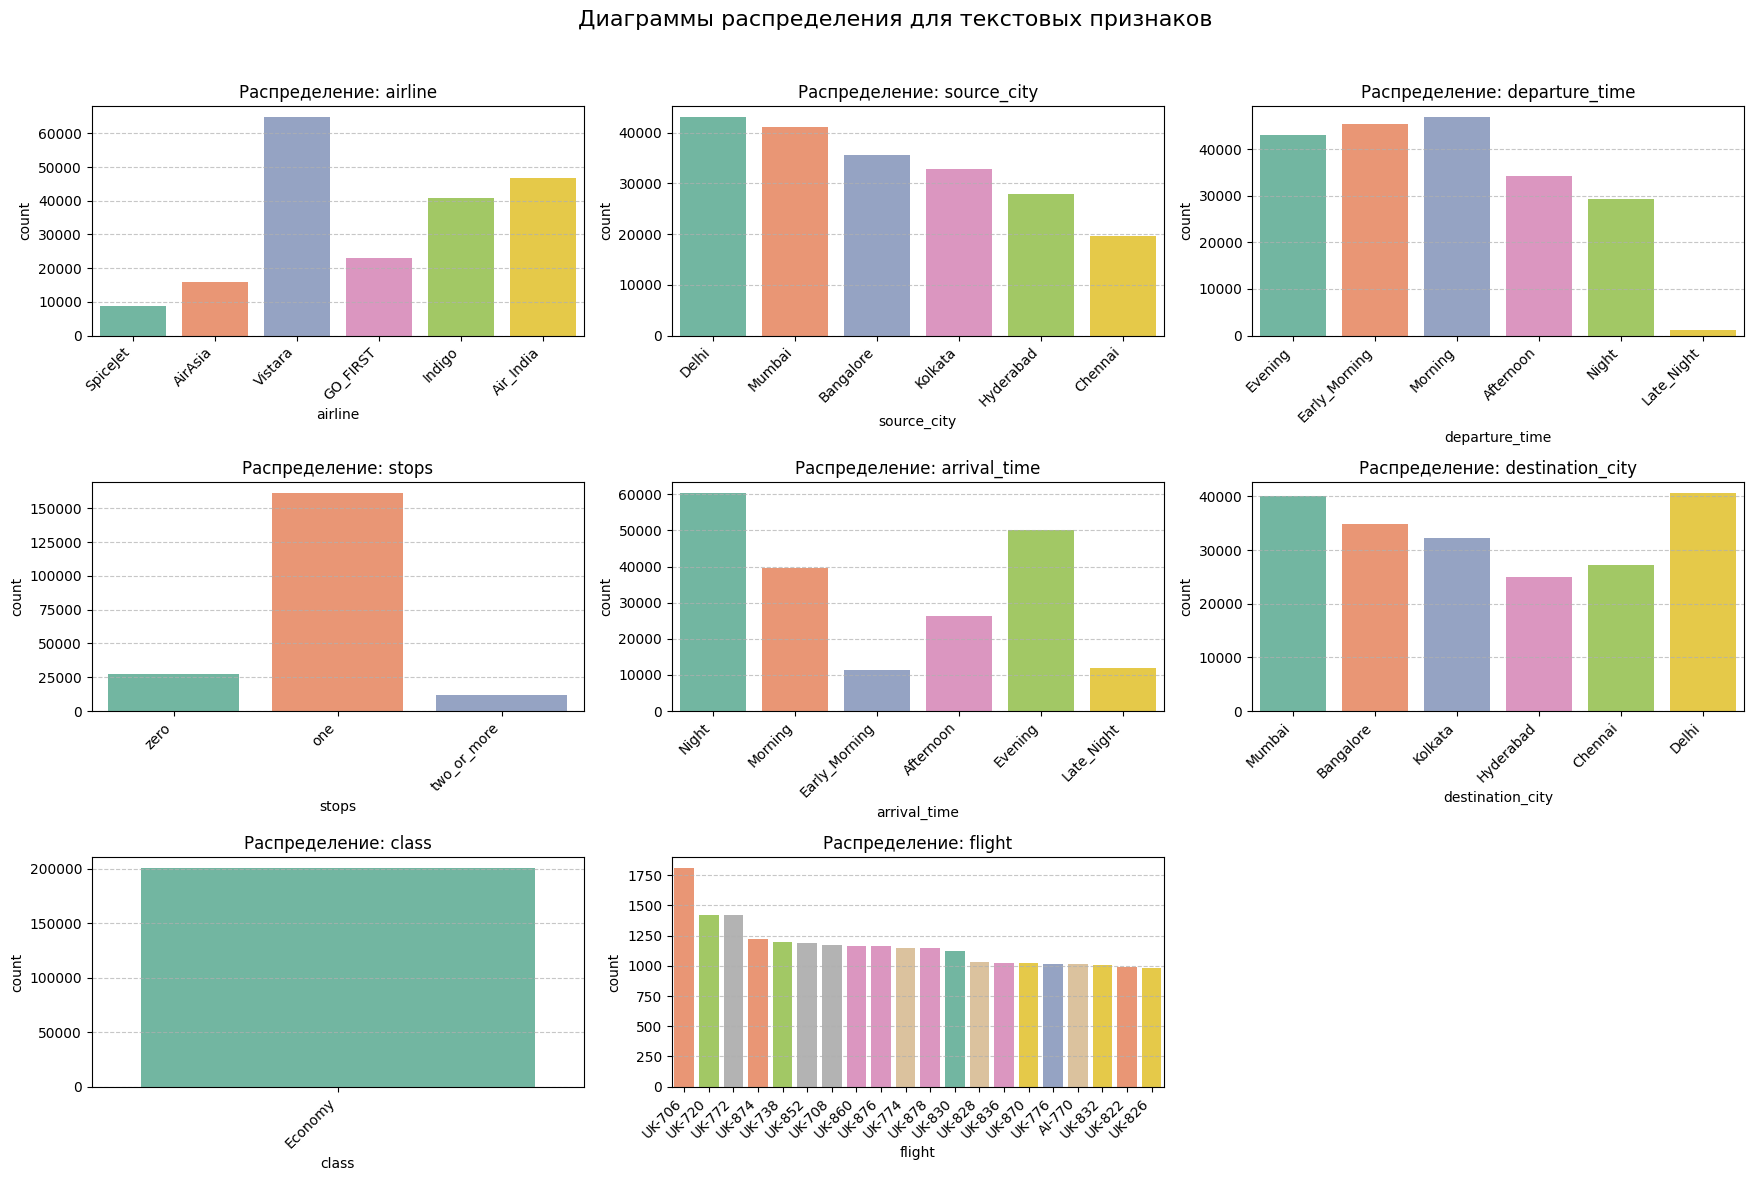

In [5]:
data = pd.read_csv('flight_price_prediction.csv')
text_columns = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'flight']

plt.figure(figsize=(18, 12))

for i, col in enumerate(text_columns):
    plt.subplot(3, 3, i + 1)

    # Для столбца 'flight' показываем только топ-20 значений из-за большого количества уникальных значений 
    if col == 'flight':
        sns.countplot(data=data, x='flight', palette="Set2", hue='flight', order=data[col].value_counts().index[:20])
    else:
        sns.countplot(data=data, x=col, palette="Set2", hue=col)

    plt.title(f"Распределение: {col}")
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.suptitle("Диаграммы распределения для текстовых признаков", fontsize=16)
plt.tight_layout(rect=[0, 0, 0.98, 0.96])
plt.savefig('graphs/quantitative_distribution_text.png')
plt.show()

In [6]:
print(f"Количество уникальных значений колонки 'flight': {len(data['flight'].unique())}")

Количество уникальных значений колонки 'flight': 1542


##### Признаки с дисбалансом

In [7]:
import json

text_columns = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

imbalanced_features = {}

for col in text_columns:
    value_counts = data[col].value_counts()
    if len(value_counts) > 1:
        most_common_ratio = value_counts.iloc[0] / value_counts.sum()
        least_common_ratio = value_counts.iloc[-1] / value_counts.sum()
        if most_common_ratio > 0.9:
            imbalanced_features[col] = {
                "most_common_value": value_counts.index[0],
                "most_common_count": int(value_counts.iloc[0]),
                "ratio": round(float(most_common_ratio), 3),
            }
        elif least_common_ratio < 0.1:
            imbalanced_features[col] = {
                "least_common_value": value_counts.index[-1],
                "least_common_count": int(value_counts.iloc[-1]),
                "ratio": round(float(least_common_ratio), 3),
            }
            

with open('stats/imbalanced_features.json', 'w', encoding='utf-8') as f:
    json.dump(imbalanced_features, f, ensure_ascii=False, indent=4)

/var/folders/cd/1jqr1m291vx1g_5dj8fnp7z40000gn/T/ipykernel_72363/1227455542.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/cd/1jqr1m291vx1g_5dj8fnp7z40000gn/T/ipykernel_72363/1227455542.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/cd/1jqr1m291vx1g_5dj8fnp7z40000gn/T/ipykernel_72363/1227455542.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/cd/1jqr1m291vx1g_5dj8fnp7z40000gn/T/ipykernel_72363/1227455542.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

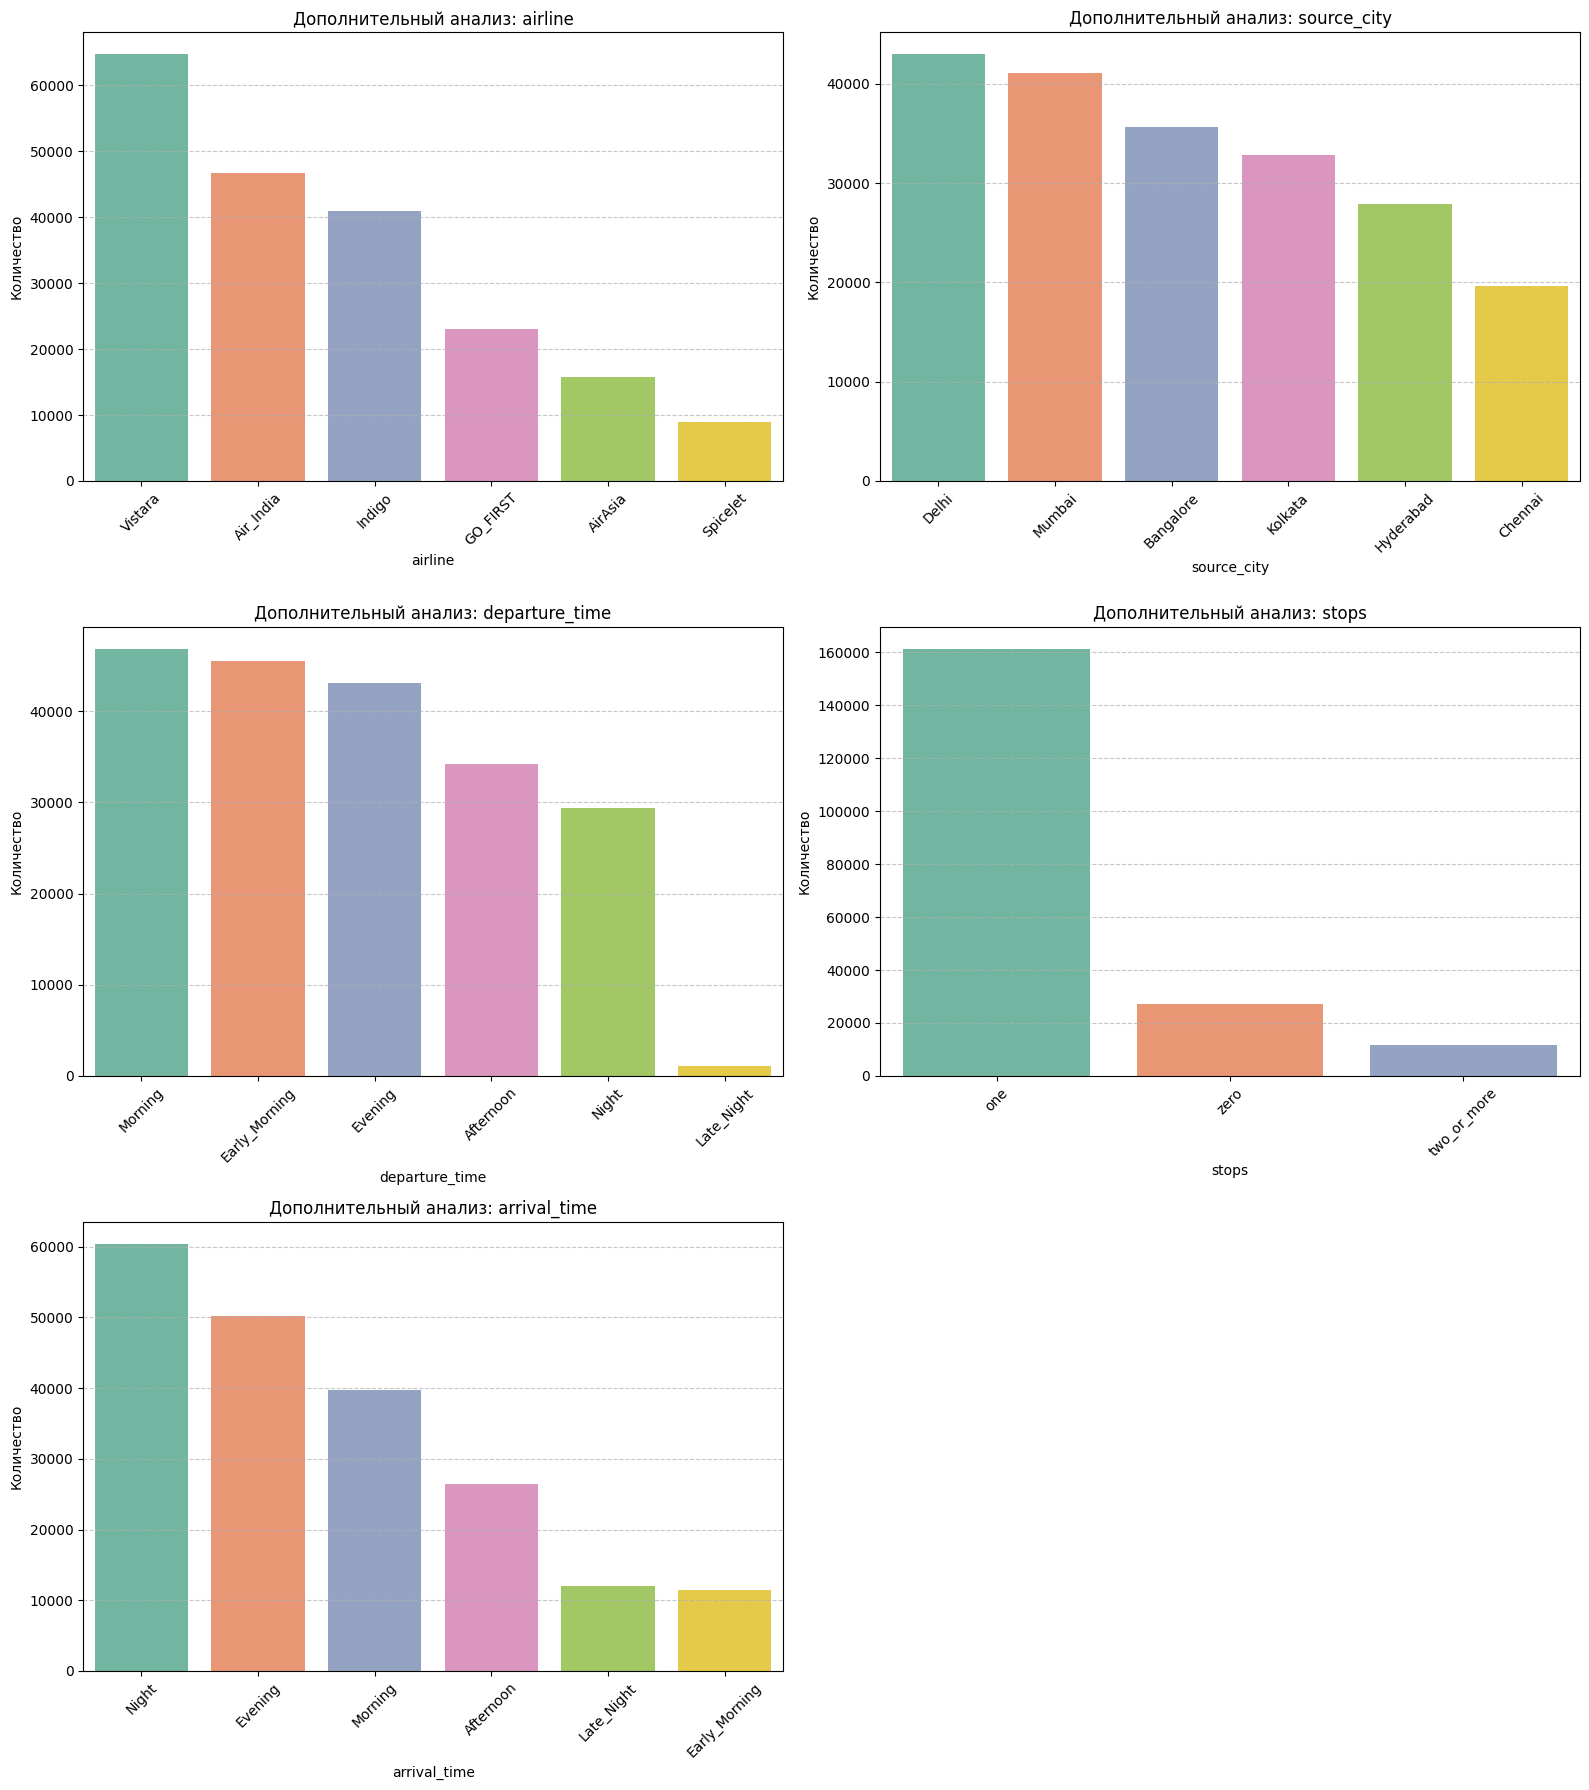

In [8]:
data = pd.read_csv('flight_price_prediction.csv')

rows = (len(imbalanced_features) + 1 ) // 2
fig, axes = plt.subplots(rows, 2, figsize=(16, rows * 6))
axes = axes.flatten()

for idx, (col, info) in enumerate(imbalanced_features.items()):
    ax = axes[idx]
    value_counts = data[col].value_counts()

    if col == "flight":
        value_counts = value_counts.tail(30)

    sns.barplot(
        x=value_counts.index,
        y=value_counts.values,
        palette="Set2",
        ax=ax,
    )
    ax.set_title(f"Дополнительный анализ: {col}")
    ax.set_xlabel(col)
    ax.set_ylabel('Количество')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.tick_params(axis='x', rotation=45)

for i in range(len(imbalanced_features), len(axes)):
    fig.delaxes(axes[i])

plt.savefig('graphs/imbalanced_graphs.png')
plt.tight_layout()
plt.show()

##### Flight имеет очень много значений - много дисбалансных значений меньше 1%

In [9]:
text_columns = ['flight']

imbalanced_flight = {}

for col in text_columns:
    value_counts = data[col].value_counts()
    if len(value_counts) > 1:
        # Вычисляем ratio для всех значений
        ratios = value_counts / value_counts.sum()

        # Сохраняем все значения, где ratio > 0.9 (наиболее частые)
        most_common_values = value_counts[ratios > 0.9]
        if not most_common_values.empty:
            imbalanced_flight[f"{col}_most_common"] = [
                {
                    "value": idx,
                    "count": int(count),
                    "ratio": round(float(ratio), 3),
                }
                for idx, count, ratio in zip(
                    most_common_values.index,
                    most_common_values.values,
                    ratios[most_common_values.index],
                )
            ]

        # Сохраняем все значения, где ratio < 0.1 (наименее частые)
        least_common_values = value_counts[ratios < 0.1]
        if not least_common_values.empty:
            imbalanced_flight[f"{col}_least_common"] = [
                {
                    "value": idx,
                    "count": int(count),
                    "ratio": round(float(ratio), 3),
                }
                for idx, count, ratio in zip(
                    least_common_values.index,
                    least_common_values.values,
                    ratios[least_common_values.index],
                )
            ]

with open('stats/imbalanced_flight.json', 'w', encoding='utf-8') as f:
    json.dump(imbalanced_flight, f, ensure_ascii=False, indent=4)